# Predictive Analysis

**Importing necessary libraries and algorithms**

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# import a variety of classification algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# import a variety of Regression algorithm
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers 
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing 
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#metrics are imported for evaluating regression 
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
#metrics are imported for classification models
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("All items Locked and Loaded!")

All items Locked and Loaded!


**Reading datasets**

In [ ]:
df = pd.read_csv(r"C:\Users\kusha\OneDrive\Desktop\Python\Projects\Prediction Of Austism\Model_2/Datasets.csv")
print("Dataset loaded!")

Dataset loaded!


In [59]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


**dropping who completed the test columns**

In [60]:
print(df)

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1                  4   m  White Europ

In [61]:
df = df.drop(['Case_No'], axis = 1)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

**Visualizing the answered questions**

In [62]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   A1                      1054 non-null   int64 
 1   A2                      1054 non-null   int64 
 2   A3                      1054 non-null   int64 
 3   A4                      1054 non-null   int64 
 4   A5                      1054 non-null   int64 
 5   A6                      1054 non-null   int64 
 6   A7                      1054 non-null   int64 
 7   A8                      1054 non-null   int64 
 8   A9                      1054 non-null   int64 
 9   A10                     1054 non-null   int64 
 10  Age_Mons                1054 non-null   int64 
 11  Qchat-10-Score          1054 non-null   int64 
 12  Sex                     1054 non-null   object
 13  Ethnicity               1054 non-null   object
 14  Jaundice                1054 non-null   object
 15  Fami

<Axes: >

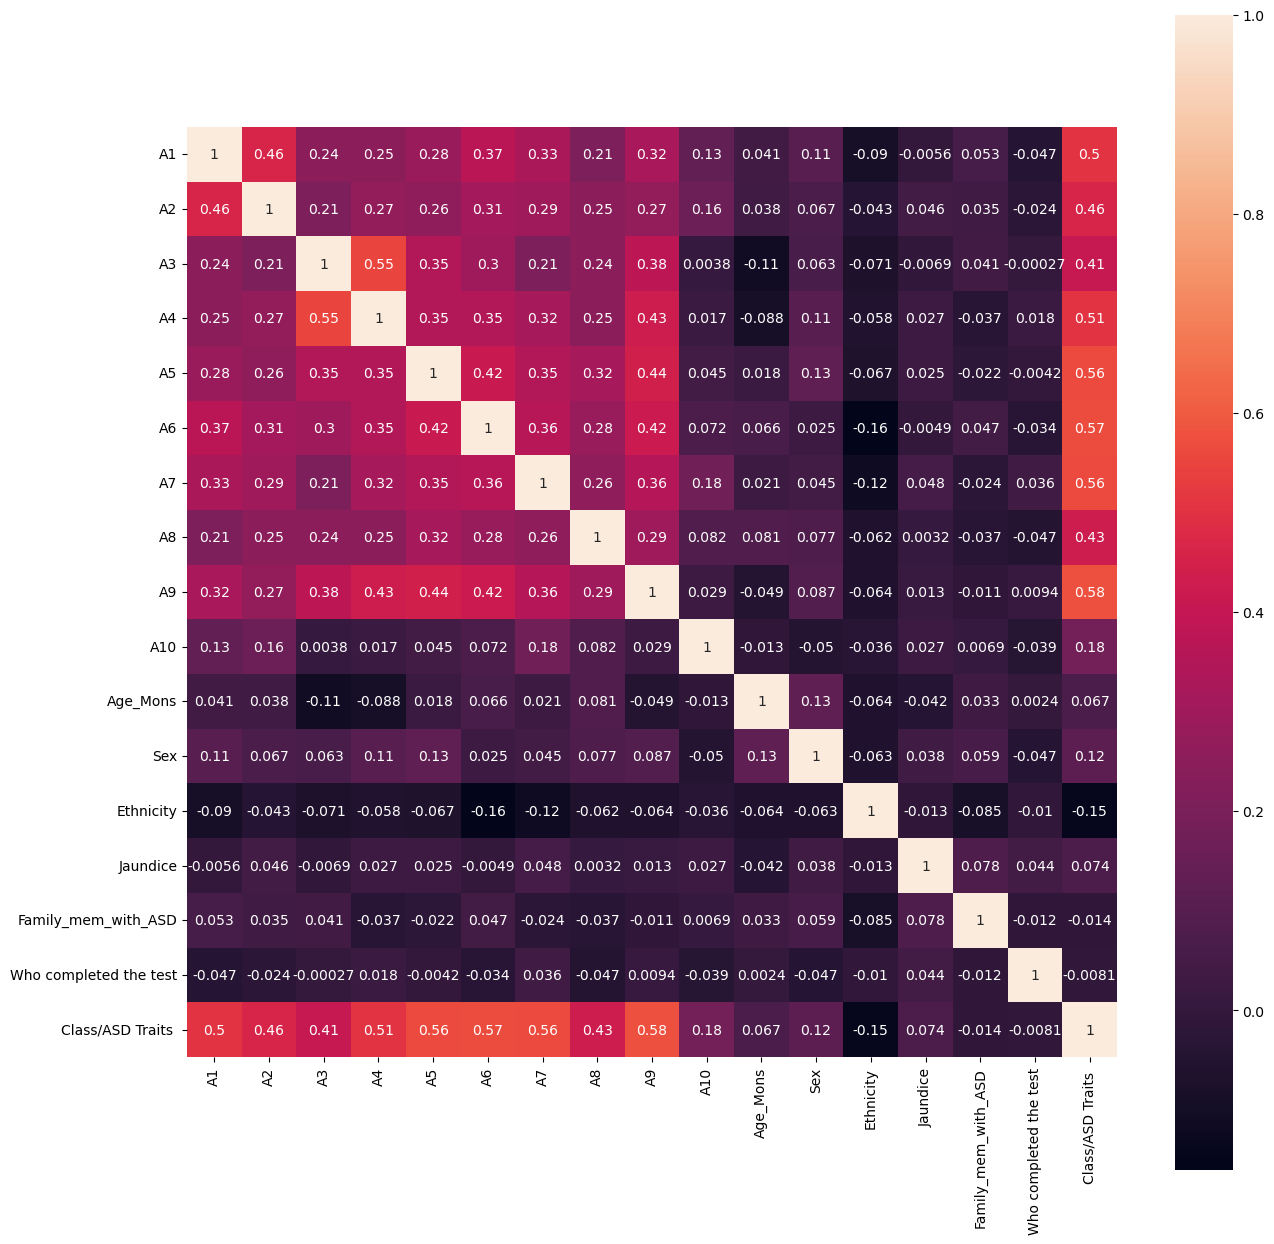

In [88]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

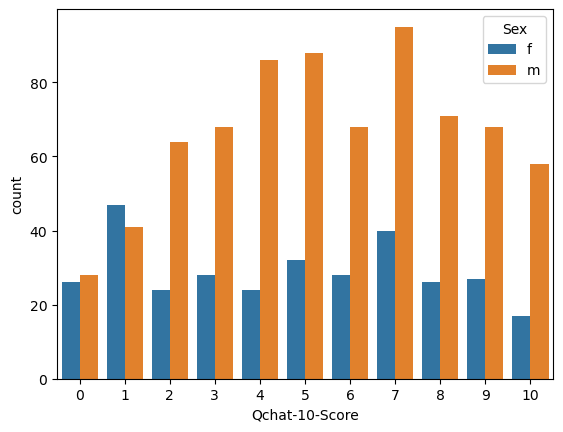

In [65]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

In [66]:
df.drop('Qchat-10-Score', axis = 1, inplace = True)

In [67]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,f,White European,no,yes,family member,No
1050,0,0,1,1,1,0,1,0,1,0,12,m,black,yes,no,family member,Yes
1051,1,0,1,1,1,1,1,1,1,1,18,m,middle eastern,yes,no,family member,Yes
1052,1,0,0,0,0,0,0,1,0,1,19,m,White European,no,yes,family member,No


**converting object into integer**

**

<Axes: xlabel='Class/ASD Traits ', ylabel='count'>

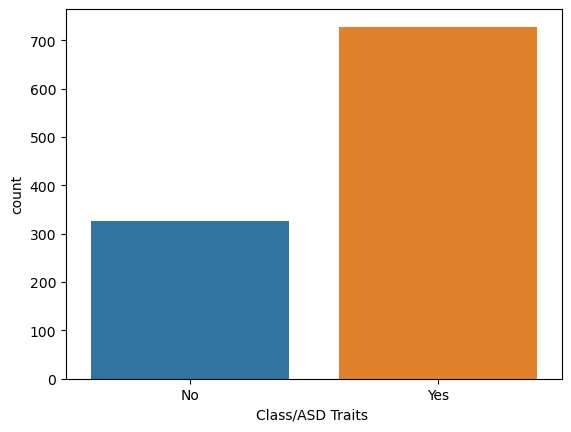

In [68]:
sns.countplot(x='Class/ASD Traits ' , data=df)

<Axes: xlabel='Jaundice', ylabel='count'>

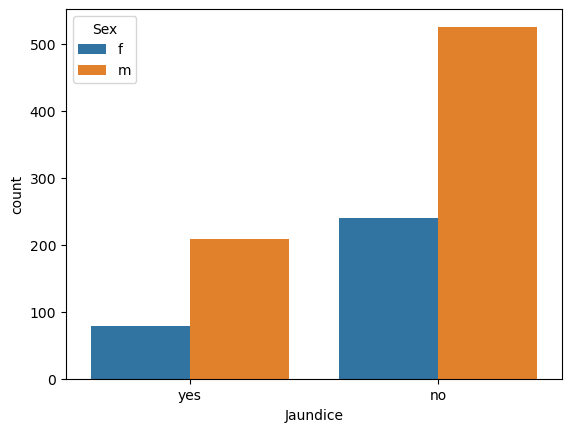

In [69]:
sns.countplot(x='Jaundice',data=df,hue='Sex')


<Axes: xlabel='Age_Mons', ylabel='Density'>

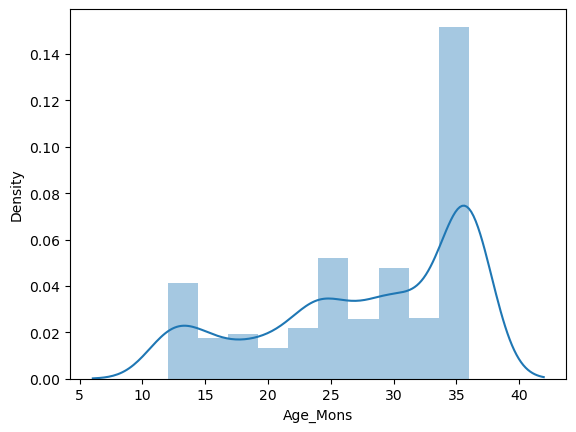

In [70]:
sns.distplot(df['Age_Mons'])

In [71]:
df['Family_mem_with_ASD'].unique()

array(['no', 'yes'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'middle eastern'),
  Text(1, 0, 'White European'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'black'),
  Text(4, 0, 'asian'),
  Text(5, 0, 'south asian'),
  Text(6, 0, 'Native Indian'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Latino'),
  Text(9, 0, 'mixed'),
  Text(10, 0, 'Pacifica')])

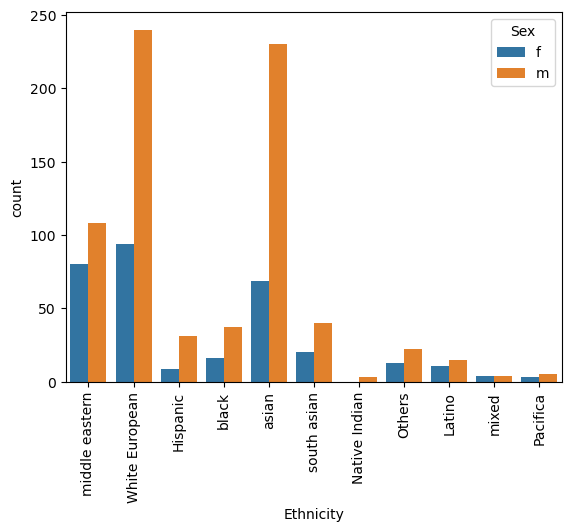

In [72]:
sns.countplot(x='Ethnicity',hue='Sex',data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Ethnicity', ylabel='count'>

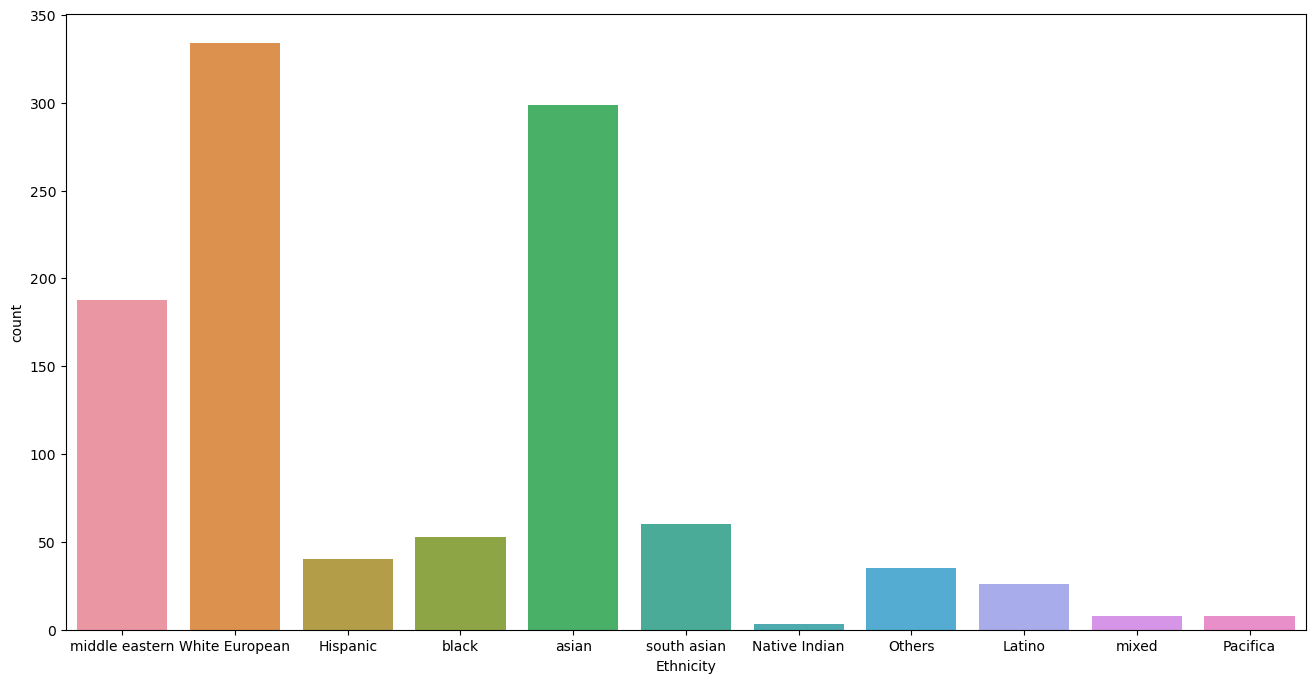

In [73]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = df)

In [74]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice','Who completed the test']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes

A1                        int64
A2                        int64
A3                        int64
A4                        int64
A5                        int64
A6                        int64
A7                        int64
A8                        int64
A9                        int64
A10                       int64
Age_Mons                  int64
Sex                       int32
Ethnicity                 int32
Jaundice                  int32
Family_mem_with_ASD       int32
Who completed the test    int32
Class/ASD Traits          int32
dtype: object

**train_test_split** -> function from scikit-learn to split the data into training and testing sets

In [75]:
X = df.drop(['Class/ASD Traits '], axis = 1)      # X is independent variable
Y = df['Class/ASD Traits ']                       # Y is dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 7)

**list of classification and regression models** -> fits each model on the training data, and prints the accuracy score for each model's predictions on the test data

In [76]:
#each model is appended to the list
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

KNN 0.8901515151515151
Decision Tree 0.9015151515151515
GNB 0.9507575757575758
SVM 0.8446969696969697


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained your models and made predictions

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    
    # Print model name and accuracy
    print(name, "Accuracy:", accuracy_score(y_test, pred))
    
    # Print classification report
    print("Classification Report for", name)
    print(classification_report(y_test, pred))
    
    # Print confusion matrix
    print("Confusion Matrix for", name)
    print(confusion_matrix(y_test, pred))
    print("\n")


KNN Accuracy: 0.8901515151515151
Classification Report for KNN
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        77
           1       0.92      0.92      0.92       187

    accuracy                           0.89       264
   macro avg       0.87      0.87      0.87       264
weighted avg       0.89      0.89      0.89       264

Confusion Matrix for KNN
[[ 63  14]
 [ 15 172]]


Decision Tree Accuracy: 0.8939393939393939
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.93      0.91      0.92       187

    accuracy                           0.89       264
   macro avg       0.87      0.88      0.87       264
weighted avg       0.90      0.89      0.89       264

Confusion Matrix for Decision Tree
[[ 65  12]
 [ 16 171]]


GNB Accuracy: 0.9507575757575758
Classification Report for GNB
              precision    

**From the above results, it can be seen that XGBoost Classifier (XGB) has the highest accuracy score of 0.989, while AdaBoost Regressor (ABR) has the lowest accuracy score of 0.443**

**grid search with cross-validation to find the best hyperparameters for a support vector machine (SVM) classifier**

In [78]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(x_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma

[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=1.2, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.8, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.8, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.9, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=0.9, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.9, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.1, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.1, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1.2, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.2, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1.3, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.3, gamma=0.8, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.3, gamma=1.2, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.3, gamma=1.3, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.4, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ....................C=1.4, gamma=1.1, kernel=linear; total time=   0.0s
[CV] END ...................

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [79]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'rbf')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

0.9166666666666666


KNN Accuracy: 0.8901515151515151
Decision Tree Accuracy: 0.9053030303030303
GNB Accuracy: 0.9507575757575758
SVM Accuracy: 0.8446969696969697


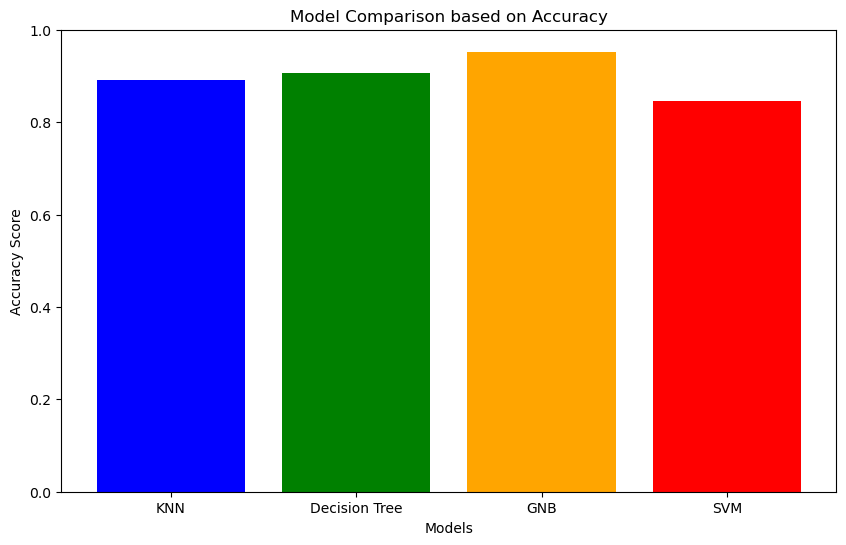

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have already trained your models and made predictions
model_names = [name for name, _ in models]
accuracies = []

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    
    # Print model name and accuracy
    print(name, "Accuracy:", acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Comparison based on Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1 for accuracy scores
plt.show()


In [81]:
x_test = x_test.to_numpy()

In [82]:
x_train = x_train.to_numpy()

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
pred = gnb.predict(x_test)
print(accuracy_score(y_test, pred))


0.9507575757575758


In [84]:
x_test

array([[0, 0, 1, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       ...,
       [1, 1, 0, ..., 1, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [1, 1, 0, ..., 0, 0, 3]], dtype=int64)

In [85]:
print(pred)

[1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1
 1 0 1 0 1]


In [86]:
print(y_test)

650    1
34     0
54     0
656    1
874    1
      ..
982    1
838    0
324    1
972    0
347    1
Name: Class/ASD Traits , Length: 264, dtype: int32


In [ ]:
df["Who completed the test"].unique()

In [ ]:
df["Ethnicity"].unique()